In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

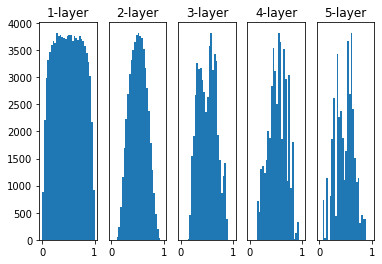

In [14]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터 1000*100
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data



#가중치의 초기값들을 랜덤으로 배치
#그때 가중치의 크기를 얼마로 할지 선택해보자.
#randn 은 평균 0 , 표준편차 1 의 랜덤 숫자 배치.
for i in range(hidden_layer_size):
    #전의 weight 결과물을 이어서 가져오자!
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    
    #표준편차를 1으로 0과 1에 치우쳐짐.
    #sigmoid가 0과 1에 가까우면 미분값이 0으로 점점 수렴하게된다.
    #w = np.random.randn(node_num, node_num) * 1             
        
    #표준편차를 0.01로  
    #가운대로 몰렸다. 어쨌든, weight가 한곳으로 몰린다는 것은 다양성이 생길 가능성이 떨어진다.
    #w = np.random.randn(node_num, node_num) * 0.01
    
    #Xavier init value
    #표준편차를 가중치개수의 제곱수의   역수!
    #꽤 준수하게 퍼뜨린다.
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    
    # He 초기 값, ReLu에 적합,  (2^(1/2))배로 한결과, 조금더 잘 퍼지는 듯하다.
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)   # i층에서 100*100의 weight를 계산!


    # 활성화 함수도 바꿔가며 실험해보자！
    
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()